In [3]:
import config
import torch
from dataset import get_dataloader
from torchsummary import summary
from model import Yolov1
from loss import YoloLoss
from train import train_fn

In [2]:
# !python preprocessing_data.py

Creating training labels ...
Generate csv file ...
Done!!


In [4]:
train_loader, val_loader, test_loader = get_dataloader()
loss_fn = YoloLoss(num_grids=config.NUM_GRIDS, num_boxes=config.NUM_BOXES)
model = Yolov1(
    in_channels=3, num_grids=config.NUM_GRIDS, num_boxes=config.NUM_BOXES
).to(config.DEVICE)
optimizer = torch.optim.Adam(model.parameters(), lr=config.LR, weight_decay=config.WEIGHT_DECAY)

In [5]:
summary(model.to(config.DEVICE), (3, 448, 448))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           9,408
       BatchNorm2d-2         [-1, 64, 224, 224]             128
         LeakyReLU-3         [-1, 64, 224, 224]               0
         ConvBlock-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 192, 112, 112]         110,592
       BatchNorm2d-7        [-1, 192, 112, 112]             384
         LeakyReLU-8        [-1, 192, 112, 112]               0
         ConvBlock-9        [-1, 192, 112, 112]               0
        MaxPool2d-10          [-1, 192, 56, 56]               0
           Conv2d-11          [-1, 128, 56, 56]          24,576
      BatchNorm2d-12          [-1, 128, 56, 56]             256
        LeakyReLU-13          [-1, 128, 56, 56]               0
        ConvBlock-14          [-1, 128,

In [6]:
mean_losses, list_best_mAP = train_fn(model, train_loader, val_loader, optimizer, loss_fn, cal_mAP_freq=25)

Start epoch:  0


100%|██████████| 88/88 [00:33<00:00,  2.65it/s, loss=tensor(8.6336, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 15.509517580270767
Start epoch:  1


100%|██████████| 88/88 [00:37<00:00,  2.34it/s, loss=tensor(2.3423, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 8.890140530737964
Start epoch:  2


100%|██████████| 88/88 [00:39<00:00,  2.25it/s, loss=tensor(3.6446, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 8.476754383607345
Start epoch:  3


100%|██████████| 88/88 [00:37<00:00,  2.32it/s, loss=tensor(0.3087, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 8.069008192894133
Start epoch:  4


100%|██████████| 88/88 [00:35<00:00,  2.45it/s, loss=tensor(6.3901, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 8.461759030141614
Start epoch:  5


100%|██████████| 88/88 [00:47<00:00,  1.86it/s, loss=tensor(0.5275, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 8.328165644949133
Start epoch:  6


100%|██████████| 88/88 [00:47<00:00,  1.86it/s, loss=tensor(5.6894, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 5.855455085635185
Start epoch:  7


100%|██████████| 88/88 [00:41<00:00,  2.10it/s, loss=tensor(3.7391, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 5.720328687944195
Start epoch:  8


100%|██████████| 88/88 [00:47<00:00,  1.85it/s, loss=tensor(1.6503, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 6.717522625896064
Start epoch:  9


100%|██████████| 88/88 [00:47<00:00,  1.86it/s, loss=tensor(0.3051, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 6.265793140638959
Start epoch:  10


100%|██████████| 88/88 [00:45<00:00,  1.94it/s, loss=tensor(1.2821, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 4.639935461296276
Start epoch:  11


100%|██████████| 88/88 [00:30<00:00,  2.85it/s, loss=tensor(2.2222, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 5.004756594246084
Start epoch:  12


100%|██████████| 88/88 [00:30<00:00,  2.85it/s, loss=tensor(5.9406, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.736126794056459
Start epoch:  13


100%|██████████| 88/88 [00:30<00:00,  2.86it/s, loss=tensor(0.8926, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.366376636380499
Start epoch:  14


100%|██████████| 88/88 [00:30<00:00,  2.85it/s, loss=tensor(4.2048, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 3.125991343774579
Start epoch:  15


100%|██████████| 88/88 [00:30<00:00,  2.84it/s, loss=tensor(1.3569, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 3.1176236048340797
Start epoch:  16


100%|██████████| 88/88 [00:31<00:00,  2.84it/s, loss=tensor(1.2607, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.834225035526536
Start epoch:  17


100%|██████████| 88/88 [00:30<00:00,  2.85it/s, loss=tensor(0.0824, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.285882160998881
Start epoch:  18


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(1.3346, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.0673893082209607
Start epoch:  19


100%|██████████| 88/88 [00:30<00:00,  2.85it/s, loss=tensor(0.3058, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.8290039475329896
Start epoch:  20


100%|██████████| 88/88 [00:30<00:00,  2.85it/s, loss=tensor(1.8997, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.5608139752664347
Start epoch:  21


100%|██████████| 88/88 [00:30<00:00,  2.84it/s, loss=tensor(0.1145, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.8917908878488974
Start epoch:  22


100%|██████████| 88/88 [00:48<00:00,  1.83it/s, loss=tensor(0.3778, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.411979916759513
Start epoch:  23


100%|██████████| 88/88 [00:44<00:00,  1.98it/s, loss=tensor(0.3917, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.5161626399918036
Start epoch:  24


100%|██████████| 88/88 [00:42<00:00,  2.06it/s, loss=tensor(0.3667, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.5644044766033236
Get boxes....
Compute mAP....
Val mAP: 0.22607210278511047
Save model
=> Saving checkpoint
Start epoch:  25


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(1.6379, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.2365312684666026
Start epoch:  26


100%|██████████| 88/88 [00:38<00:00,  2.31it/s, loss=tensor(2.0615, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.7110439615154809
Start epoch:  27


100%|██████████| 88/88 [00:41<00:00,  2.14it/s, loss=tensor(0.0564, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.6711963970552792
Start epoch:  28


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(0.5375, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.7034614531492644
Start epoch:  29


100%|██████████| 88/88 [00:41<00:00,  2.11it/s, loss=tensor(0.3199, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.584079100411724
Start epoch:  30


100%|██████████| 88/88 [00:38<00:00,  2.27it/s, loss=tensor(0.2955, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.2374412960965524
Start epoch:  31


100%|██████████| 88/88 [00:39<00:00,  2.24it/s, loss=tensor(0.4107, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9390853084200486
Start epoch:  32


100%|██████████| 88/88 [00:38<00:00,  2.26it/s, loss=tensor(0.6728, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.4191875980997628
Start epoch:  33


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(1.6059, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9714939993890849
Start epoch:  34


100%|██████████| 88/88 [00:38<00:00,  2.27it/s, loss=tensor(0.0240, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9376548170958731
Start epoch:  35


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.5474, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1987474213184959
Start epoch:  36


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(2.3091, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.2104595011015507
Start epoch:  37


100%|██████████| 88/88 [00:38<00:00,  2.28it/s, loss=tensor(2.1178, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1057717591862788
Start epoch:  38


100%|██████████| 88/88 [00:40<00:00,  2.18it/s, loss=tensor(0.2730, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7041365743022073
Start epoch:  39


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(1.6174, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.0293290563224053
Start epoch:  40


100%|██████████| 88/88 [00:38<00:00,  2.29it/s, loss=tensor(0.0719, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.8917816667394205
Start epoch:  41


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.1793, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.8815375342118469
Start epoch:  42


100%|██████████| 88/88 [00:38<00:00,  2.30it/s, loss=tensor(0.0232, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.891714363718744
Start epoch:  43


100%|██████████| 88/88 [00:38<00:00,  2.27it/s, loss=tensor(0.1977, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9722697881304405
Start epoch:  44


100%|██████████| 88/88 [00:40<00:00,  2.20it/s, loss=tensor(0.1860, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9720266739075835
Start epoch:  45


100%|██████████| 88/88 [00:37<00:00,  2.35it/s, loss=tensor(0.0257, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7798095097003336
Start epoch:  46


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.1077, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.4927797165106643
Start epoch:  47


100%|██████████| 88/88 [00:30<00:00,  2.85it/s, loss=tensor(0.1162, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.46556267203678464
Start epoch:  48


100%|██████████| 88/88 [00:30<00:00,  2.84it/s, loss=tensor(0.1166, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.41820037667639554
Start epoch:  49


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(1.0981, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.35538571133193647
Get boxes....
Compute mAP....
Val mAP: 0.40153607726097107
Save model
=> Saving checkpoint
Start epoch:  50


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0242, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2638126992493529
Start epoch:  51


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.0144, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2475683055077256
Start epoch:  52


100%|██████████| 88/88 [00:30<00:00,  2.85it/s, loss=tensor(0.1707, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.21203289949335158
Start epoch:  53


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.3178, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.19512601061300797
Start epoch:  54


100%|██████████| 88/88 [00:30<00:00,  2.85it/s, loss=tensor(0.0394, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.19219654356129467
Start epoch:  55


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.5586, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.1802570080829107
Start epoch:  56


100%|██████████| 88/88 [00:30<00:00,  2.84it/s, loss=tensor(0.0820, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.16818154911214317
Start epoch:  57


100%|██████████| 88/88 [00:31<00:00,  2.84it/s, loss=tensor(2.3247, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.19273551189425317
Start epoch:  58


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.0209, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5390391896944493
Start epoch:  59


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(3.0060, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 4.337539208714258
Start epoch:  60


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(2.1580, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 5.336078692904928
Start epoch:  61


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.0980, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.941464790820398
Start epoch:  62


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(1.0099, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 2.465698644857515
Start epoch:  63


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.4765, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 1.7766533251851797
Start epoch:  64


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(1.4379, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.6642743809656664
Start epoch:  65


100%|██████████| 88/88 [00:32<00:00,  2.69it/s, loss=tensor(0.2461, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9906598814678463
Start epoch:  66


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.0253, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7647779514505104
Start epoch:  67


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0171, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6364309658635069
Start epoch:  68


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.5373, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.45599296733482997
Start epoch:  69


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.1611, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.39840134751813655
Start epoch:  70


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0335, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.42602768929844553
Start epoch:  71


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0122, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2894367392344231
Start epoch:  72


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.0078, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.24276724390008234
Start epoch:  73


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.9463, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.24010222229513933
Start epoch:  74


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.2386, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2205281382087957
Get boxes....
Compute mAP....
Val mAP: 0.4318466782569885
Save model
=> Saving checkpoint
Start epoch:  75


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.0170, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.19548745861869643
Start epoch:  76


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.2490, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.30178337899798696
Start epoch:  77


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0415, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.23028875463007187
Start epoch:  78


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.0923, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.25910531999331643
Start epoch:  79


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.9035, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.215265021818182
Start epoch:  80


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0049, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.17363109494114973
Start epoch:  81


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0153, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.20129290542734618
Start epoch:  82


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0576, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.20446458023930478
Start epoch:  83


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.2251, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.25817733361724426
Start epoch:  84


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.2642, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.46160306957211683
Start epoch:  85


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.5984, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7859017582483251
Start epoch:  86


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(2.0819, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7907878028398211
Start epoch:  87


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.2849, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9402187031439759
Start epoch:  88


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.6441, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7243171531537717
Start epoch:  89


100%|██████████| 88/88 [00:31<00:00,  2.78it/s, loss=tensor(0.1300, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6765823842195625
Start epoch:  90


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.2257, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.4927586053328758
Start epoch:  91


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.6196, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.3879817233166911
Start epoch:  92


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.1532, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.8509344701993872
Start epoch:  93


100%|██████████| 88/88 [00:31<00:00,  2.76it/s, loss=tensor(0.4192, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.46476637859913433
Start epoch:  94


100%|██████████| 88/88 [00:31<00:00,  2.77it/s, loss=tensor(0.0938, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.33556627262045036
Start epoch:  95


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.1379, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.28604361114346166
Start epoch:  96


100%|██████████| 88/88 [00:31<00:00,  2.79it/s, loss=tensor(0.4200, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2264932105529376
Start epoch:  97


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.1588, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.17782353917242621
Start epoch:  98


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0062, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.15501998009329493
Start epoch:  99


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0340, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.14775406412610953
Get boxes....
Compute mAP....
Val mAP: 0.4478277266025543
Save model
=> Saving checkpoint
Start epoch:  100


100%|██████████| 88/88 [00:31<00:00,  2.78it/s, loss=tensor(0.0144, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.14101895754521881
Start epoch:  101


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.1384, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.16259321772535754
Start epoch:  102


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0386, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.21269996342545544
Start epoch:  103


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0717, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.3264966593758965
Start epoch:  104


100%|██████████| 88/88 [00:31<00:00,  2.79it/s, loss=tensor(0.1935, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.37964621624401346
Start epoch:  105


100%|██████████| 88/88 [00:31<00:00,  2.75it/s, loss=tensor(0.0319, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2598156555217098
Start epoch:  106


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.0287, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.22241445937701923
Start epoch:  107


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.0145, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.17774746879215605
Start epoch:  108


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.1722, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2802976612477902
Start epoch:  109


100%|██████████| 88/88 [00:32<00:00,  2.74it/s, loss=tensor(1.5426, device='cuda:0', grad_fn=<AddBackward0>)] 


Mean loss was 3.0443744261495094
Start epoch:  110


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.1310, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 2.2538336776196957
Start epoch:  111


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.8026, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.9470724292438139
Start epoch:  112


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.1382, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5893397568936714
Start epoch:  113


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.2553, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.4539916199123995
Start epoch:  114


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.0853, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.26758221424692735
Start epoch:  115


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.1372, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2559298498513685
Start epoch:  116


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.6029, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.20362001677064903
Start epoch:  117


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0562, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.16209691180847585
Start epoch:  118


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0843, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.1637761310928247
Start epoch:  119


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0215, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.12228296576491134
Start epoch:  120


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.0241, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.09106787583071062
Start epoch:  121


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.0488, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.08139841340016574
Start epoch:  122


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0423, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.09467665970706465
Start epoch:  123


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.9845, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.09006217648063532
Start epoch:  124


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.4432, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5843243650584058
Get boxes....
Compute mAP....
Val mAP: 0.3582538664340973
Start epoch:  125


100%|██████████| 88/88 [00:31<00:00,  2.79it/s, loss=tensor(0.4812, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.7845294692511247
Start epoch:  126


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(1.2945, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.0665735318748788
Start epoch:  127


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.4045, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.2741003602489152
Start epoch:  128


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(1.6543, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.922593999971551
Start epoch:  129


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0197, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6065719453829594
Start epoch:  130


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.1466, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2809546807653863
Start epoch:  131


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.1111, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.17535379947036167
Start epoch:  132


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0904, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.11757352830185978
Start epoch:  133


100%|██████████| 88/88 [00:31<00:00,  2.84it/s, loss=tensor(0.0944, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.16194819096497007
Start epoch:  134


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.2068, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.10160297477109866
Start epoch:  135


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0051, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.07539343368791213
Start epoch:  136


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0612, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.06185497373173183
Start epoch:  137


100%|██████████| 88/88 [00:31<00:00,  2.84it/s, loss=tensor(0.0705, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.05650557714133439
Start epoch:  138


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0060, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.05872527713654563
Start epoch:  139


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0025, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.0575847715689716
Start epoch:  140


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.0518, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.07125532686371695
Start epoch:  141


100%|██████████| 88/88 [00:31<00:00,  2.84it/s, loss=tensor(0.0083, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.11302329493231479
Start epoch:  142


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0290, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2321542804499834
Start epoch:  143


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.0631, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.29321750738150015
Start epoch:  144


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.1126, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.20111286334312437
Start epoch:  145


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0024, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.1662148981228132
Start epoch:  146


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.2783, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.12243689155862243
Start epoch:  147


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.1403, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.08515992352146316
Start epoch:  148


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.1122, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.20332901464478875
Start epoch:  149


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0308, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.11395278604785827
Get boxes....
Compute mAP....
Val mAP: 0.45190921425819397
Save model
=> Saving checkpoint
Start epoch:  150


100%|██████████| 88/88 [00:31<00:00,  2.78it/s, loss=tensor(0.0340, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.09201699011662806
Start epoch:  151


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0020, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.08469289109449495
Start epoch:  152


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.0125, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.06545466780980033
Start epoch:  153


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0073, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.08818328745705499
Start epoch:  154


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0055, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.10267793703083457
Start epoch:  155


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.1314, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.11473822382024744
Start epoch:  156


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0306, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.19179499066773464
Start epoch:  157


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0793, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.3605498503470285
Start epoch:  158


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.4111, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6601121917959641
Start epoch:  159


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.6735, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.1986373937688768
Start epoch:  160


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.1931, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.2765156680464067
Start epoch:  161


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0081, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 1.0530836805277928
Start epoch:  162


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0835, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.43710289224558935
Start epoch:  163


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.8655, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.4251058135308664
Start epoch:  164


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0413, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.23145453656219284
Start epoch:  165


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.1405, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.20675652803302827
Start epoch:  166


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.1376, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.15476140909066255
Start epoch:  167


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0610, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.09127971296071667
Start epoch:  168


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0450, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.11348794998114252
Start epoch:  169


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.1585, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.2670391144294461
Start epoch:  170


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0369, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.09743535567858172
Start epoch:  171


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0706, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.09232723144602707
Start epoch:  172


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0072, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.07309053351954473
Start epoch:  173


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0481, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.06417703545197252
Start epoch:  174


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0104, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.07673785010543228
Get boxes....
Compute mAP....
Val mAP: 0.43089455366134644
Start epoch:  175


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0073, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.0850567842320412
Start epoch:  176


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0449, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.08277777204057202
Start epoch:  177


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0209, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.05926032817329873
Start epoch:  178


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0814, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.056765376288570805
Start epoch:  179


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0194, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.05337940014115619
Start epoch:  180


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0130, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.05499522542760877
Start epoch:  181


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0091, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.06988359772896563
Start epoch:  182


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0342, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.08163751150872982
Start epoch:  183


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.0152, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.10529408428754489
Start epoch:  184


100%|██████████| 88/88 [00:31<00:00,  2.80it/s, loss=tensor(0.0185, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.14609242348656568
Start epoch:  185


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0599, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.1752832500285215
Start epoch:  186


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.4786, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.1639884125906974
Start epoch:  187


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.3099, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.19148772181308066
Start epoch:  188


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.1151, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.27263078752862796
Start epoch:  189


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0205, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.27794264831622556
Start epoch:  190


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.7762, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.6187052087307993
Start epoch:  191


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.2803, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.5233986297706988
Start epoch:  192


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.3225, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.19731695374304598
Start epoch:  193


100%|██████████| 88/88 [00:31<00:00,  2.81it/s, loss=tensor(0.0088, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.10879082669800316
Start epoch:  194


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.0268, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.07716778768967329
Start epoch:  195


100%|██████████| 88/88 [00:31<00:00,  2.83it/s, loss=tensor(0.0433, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.07535765466640111
Start epoch:  196


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0410, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.0783266154361296
Start epoch:  197


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0054, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.06417968625001694
Start epoch:  198


100%|██████████| 88/88 [00:30<00:00,  2.84it/s, loss=tensor(0.0468, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.05951271449554373
Start epoch:  199


100%|██████████| 88/88 [00:31<00:00,  2.82it/s, loss=tensor(0.0600, device='cuda:0', grad_fn=<AddBackward0>)]


Mean loss was 0.06194078733890571
Get boxes....
Compute mAP....
Val mAP: 0.43203049898147583
Done!!!, best_mAP:  0.45190921425819397


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
from utils import yolobox_to_realbox, get_list_of_boxes, do_NMS, load_checkpoint

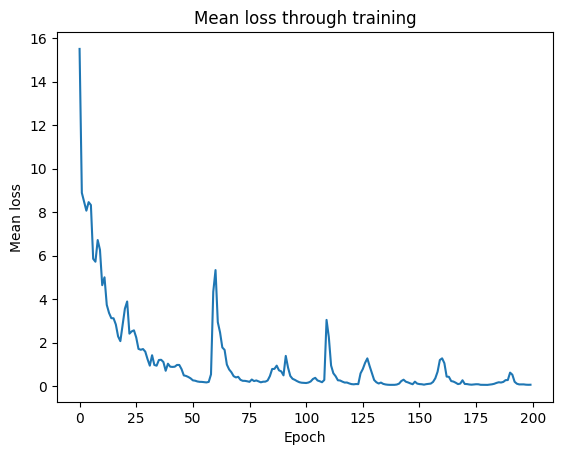

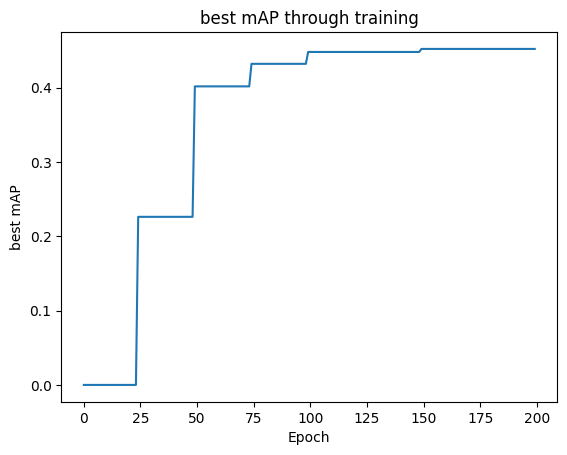

In [8]:
fig = plt.figure()
x = np.arange(len(mean_losses))
plt.plot(x, mean_losses)
plt.title('Mean loss through training')
plt.xlabel('Epoch')
plt.ylabel('Mean loss')
plt.show()

fig = plt.figure()
x = np.arange(len(list_best_mAP))
plt.plot(x, list_best_mAP)
plt.title('best mAP through training')
plt.xlabel('Epoch')
plt.ylabel('best mAP')
plt.show()

In [9]:
def draw_bounding_boxes(image, bndboxes, with_confidence_score=False):
    """Draw parsing bounding boxes on an image and saves it.
        Args:
            image_path (path): Path to the image.
            bndboxes (list): List of predicted bounding boxes, format: [x, y, w, h, cls, conf].
            with_confidence_score (bool, optional): Show confidence score or not. Defaults is False.
        Returns:
            (Image): The image with drawn bounding boxes.
    """
    # Load the image
    new_image = image.copy()
    image_height, image_width, _ = image.shape
    
    for obj in bndboxes:
        xmin, ymin, xmax, ymax = yolobox_to_realbox(obj[:4], image_width, image_height)
        text = f"{obj[4]}" if with_confidence_score else ""
        new_image = cv2.rectangle(new_image, (xmin, ymin), (xmax, ymax), color=(255,0,0), thickness=2)
        new_image = cv2.putText(new_image, text, (xmin, ymin-5), fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                   fontScale=0.5, color=(255,0,0), thickness=2, lineType=cv2.LINE_AA)  
    return new_image


def display_image(image_path, predicted_bndboxes=None, label_path=None):
    """Display an image with optinal predicted bounding boxes and true bounding boxes
    
        Args:
            image_path (Path): Path to image
            predicted_bndboxes (list | np.darray, optinal): 
            label_path (str, optinal): Path to true bounding boxes. Default is None
    """
    # Create a figure for plotting
    image_name = image_path.split('/')[-1]
    fig = plt.figure(figsize=(12, 8))
    num_rows = 1
    num_cols = 3 if (predicted_bndboxes is not None and label_path is not None) else 2  
    
    # Load the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    
    # Display the original image
    image_index = 1
    ax1 = plt.subplot(num_rows, num_cols, image_index)
    ax1.imshow(image)
    ax1.set_title('Original image')
    
    # Display the predicted bounding boxes
    if predicted_bndboxes is not None:
        image_index += 1
        ax2 = plt.subplot(num_rows, num_cols, image_index)
        predicted_image = draw_bounding_boxes(image, predicted_bndboxes, with_confidence_score=True)
        ax2.imshow(predicted_image)
        ax2.set_title('Prediction')
    
    
    # Display the true bouding boxes
    if label_path is not None:
        image_index += 1
        ax3 = plt.subplot(num_rows, num_cols, image_index)
        
        # Load true bounding boxes from label file
        true_bndboxes = []
        with open(label_path) as label_file:
            for line in label_file.readlines():
                bndbox = list(map(float, line.split()))
                order = [0, 1, 2, 3]
                bndbox = [bndbox[order[i]] for i in range(4)]
                true_bndboxes.append(bndbox)
        
        groundtruth_image = draw_bounding_boxes(image, true_bndboxes, with_confidence_score=False)
        ax3.imshow(groundtruth_image)
        ax3.set_title('Grouth truth')
    fig.tight_layout()
    plt.show()

    
def get_prediction(model, image, threshold, iou_threshold):
    model.eval()
    prediction = model(image)
    prediction = prediction.reshape(1, config.NUM_GRIDS, config.NUM_GRIDS, -1)
    prediction = get_list_of_boxes(prediction, S=config.NUM_GRIDS)
    for i in range(1):
        nms_boxes = do_NMS(prediction[i], threshold=threshold, iou_threshold=iou_threshold)
    model.train()
    return nms_boxes

In [10]:
load_checkpoint(torch.load('checkpoint.pth.tar'), model, optimizer)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17704\223257137.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  load_checkpoint(torch.load('checkpoint.pth.tar'), model, opti

=> Loading checkpoint


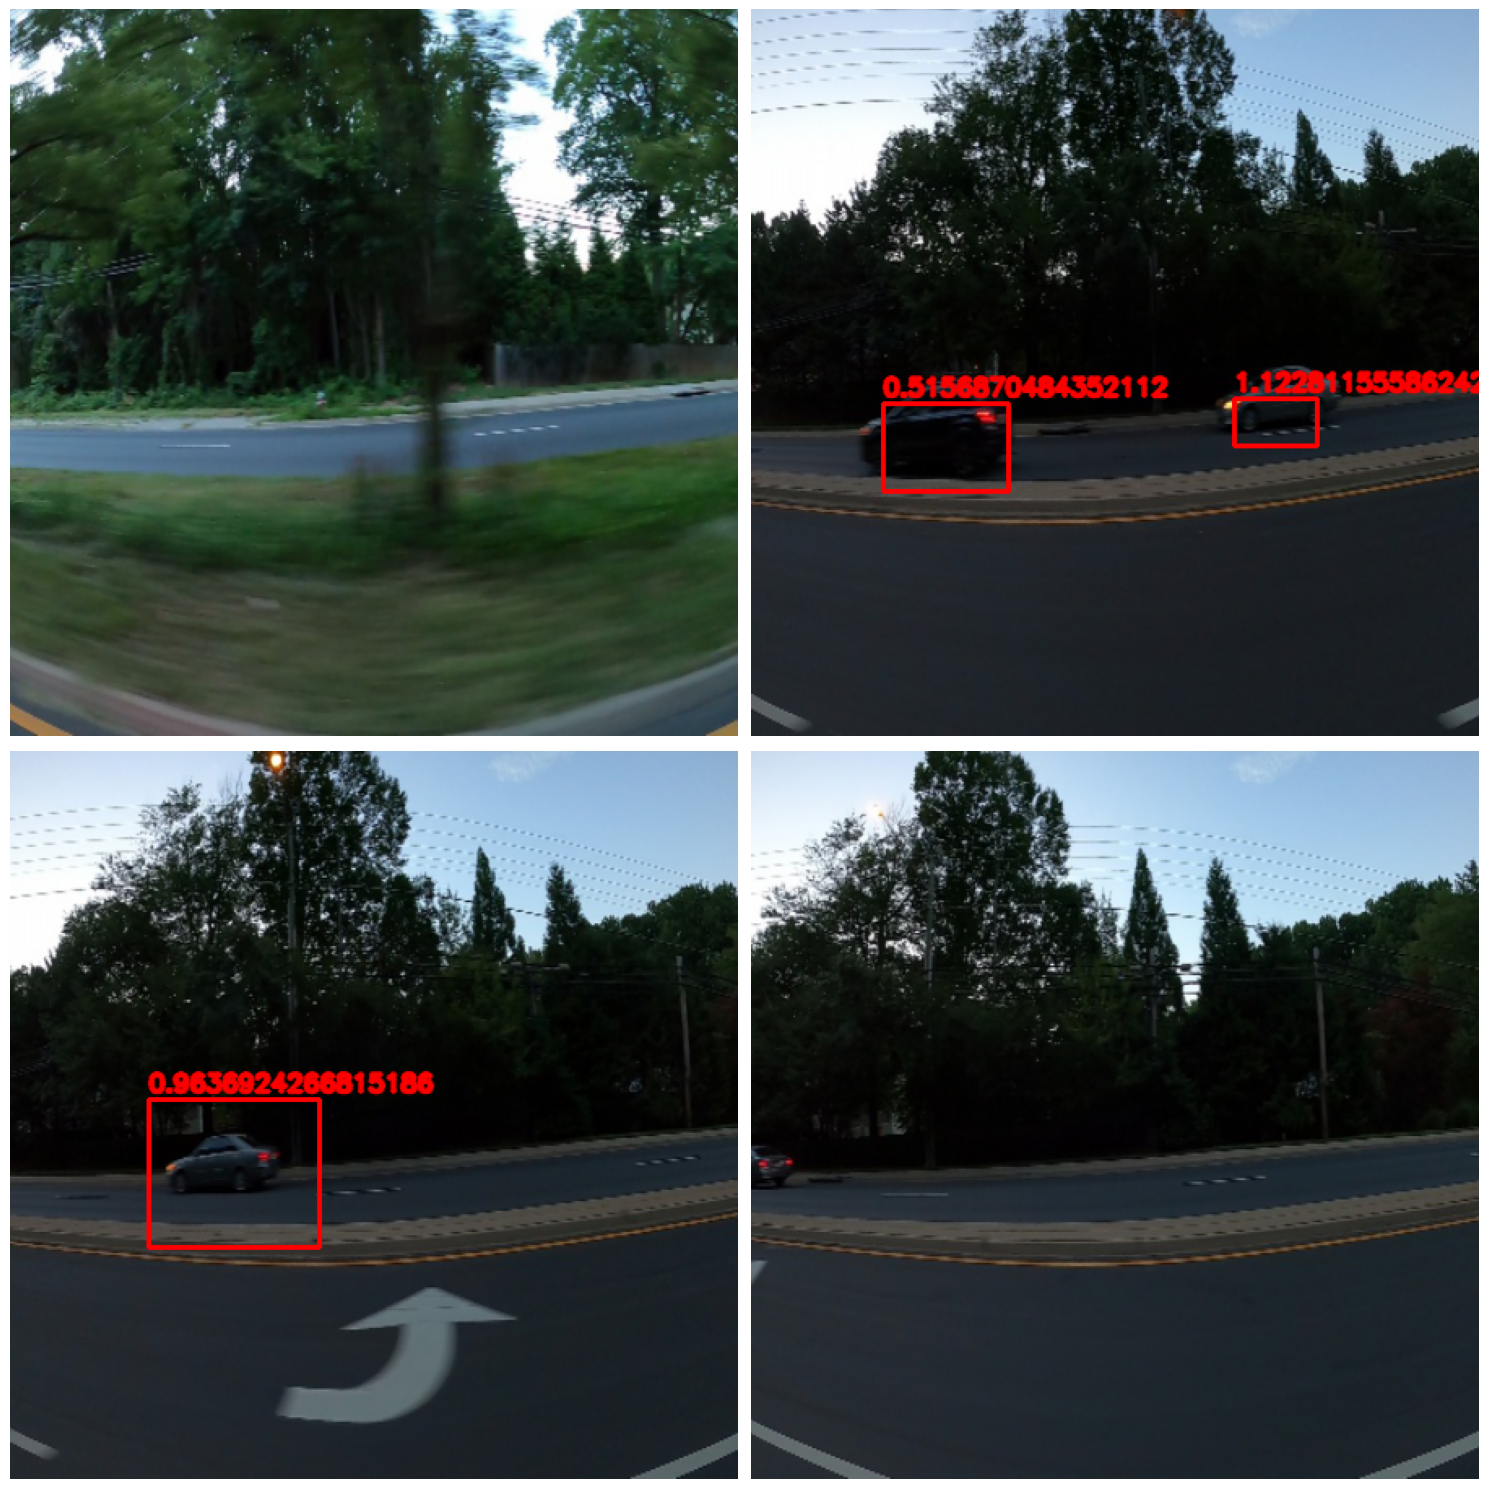

In [16]:
it = iter(test_loader)

for _ in range(13): # batch 13-th
    batch_images, batch_labels = next(it)
    batch_labels = get_list_of_boxes(batch_labels.to(config.DEVICE), S=config.NUM_GRIDS)

fig = plt.figure(figsize=(15, 15))
for i in range(4):  
    image = batch_images[i].to(config.DEVICE)
    boxes = get_prediction(model, image.unsqueeze(0), threshold=0.5, iou_threshold=0.5)
    numpy_image = image.cpu().numpy()
    numpy_image = np.transpose(numpy_image, (1, 2, 0)).astype('uint8')
    numpy_image = np.ascontiguousarray(numpy_image)

    numpy_image = draw_bounding_boxes(numpy_image, boxes, with_confidence_score=True)
    plt.subplot(2, 2, i+1)
    plt.imshow(numpy_image)
    plt.axis('off')
    
plt.tight_layout()
plt.show()